#### Import Libraries

In [3]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt, seaborn as sns

#### Load Datasets

In [10]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
train = df.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

#### Missing Values 

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.drop(columns='Cabin',inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
train['Age'] = imputer.fit_transform(train[['Age']])


In [15]:
train.fillna({'Embarked':train['Embarked'].mode()[0]}, inplace=True)
print(train.isnull().sum().sum())

0


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Encoding Categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])

### Data Analysis

#### Survival Count

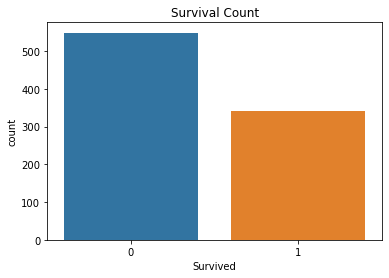

In [17]:

sns.countplot(x='Survived',data = train)
plt.title('Survival Count')
plt.show()

#### Survival by Gender 

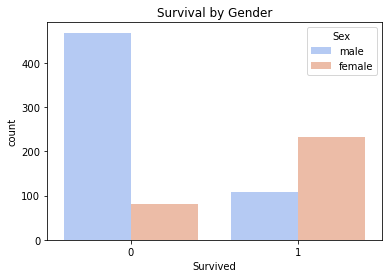

In [18]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=train, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()

In [19]:
# Percentage of survived men and women
survival_rate = train.groupby('Sex')['Survived'].mean() * 100
print("Survival Percentage:\n", survival_rate)

Survival Percentage:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


#### Age Distribution

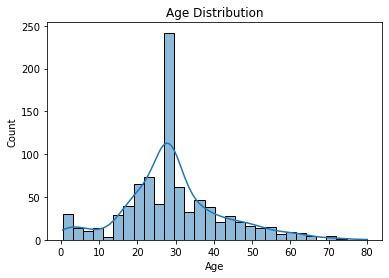

In [20]:
sns.histplot(train['Age'], bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

#### Survival by Age and Gender Combined

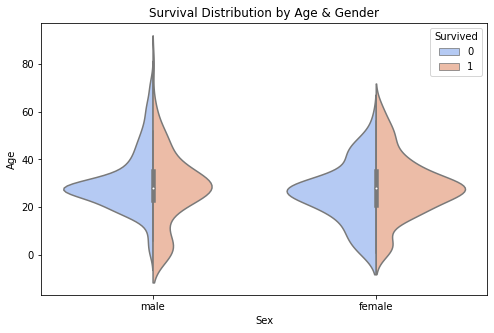

In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, palette='coolwarm')
plt.title('Survival Distribution by Age & Gender')
plt.show()


#### Survival by Passenger Class

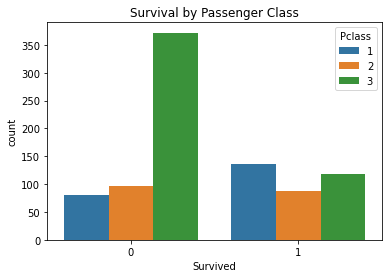

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()

#### Survival by Embarked location

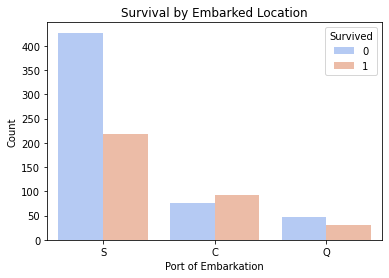

In [24]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='coolwarm')
plt.title('Survival by Embarked Location')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

#### Survival by Family Size

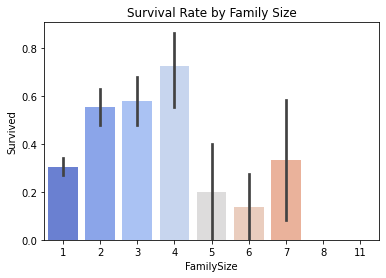

In [31]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.show()


#### Correlation Heatmap

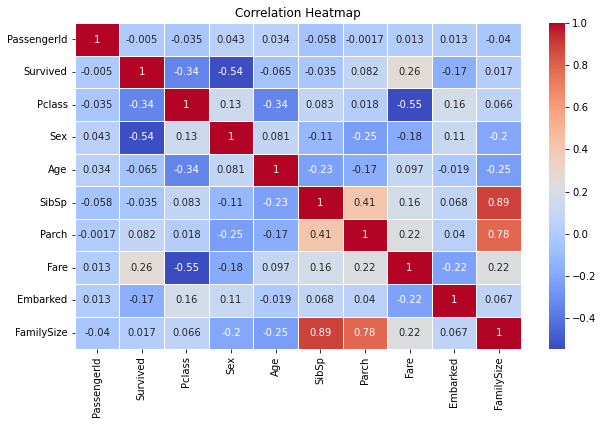

In [32]:
train_num = train.select_dtypes(include=['number'])
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Fare vs Passenger Class

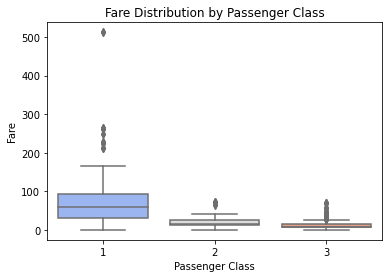

In [34]:
# Scatter plot between Passenger Class and Fare
sns.boxplot(x='Pclass', y='Fare', data=train, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [38]:
# Statistical Analysis: Chi-Square Test for Categorical Features
from scipy.stats import chi2_contingency
chi2_features = ['Sex', 'Pclass', 'Embarked']
for feature in chi2_features:
    table = pd.crosstab(train[feature], train['Survived'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"Chi-Square Test for {feature}: p-value = {p:.5f}")
    if p < 0.05:
        print(f"{feature} has a statistically significant relationship with survival.")
    else:
        print(f"{feature} does not have a statistically significant relationship with survival.")

Chi-Square Test for Sex: p-value = 0.00000
Sex has a statistically significant relationship with survival.
Chi-Square Test for Pclass: p-value = 0.00000
Pclass has a statistically significant relationship with survival.
Chi-Square Test for Embarked: p-value = 0.00000
Embarked has a statistically significant relationship with survival.


#### Insights
1. Women had a significantly higher survival rate than men.
2. First-class passengers were more likely to survive than lower-class passengers.
3. Younger passengers, particularly children, had better survival rates.
4. Passengers who embarked from 'C' had a slightly higher survival rate.
5. Passengers with higher fare prices had better chances of survival, indicating wealth played a role.
6. Traveling alone negatively impacted survival rates.
7. The Chi-Square test confirms that Sex, Pclass, and Embarked have a significant relationship with survival.

